<a href="https://colab.research.google.com/github/agwn1819/EINT_SS_19/blob/master/Masterarbeit_SVM_Classifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Type : Multi-Class Classification
### Algorithm : SVM

In [1]:
#### import Library
import numpy as np
import pandas as pd
import glob, os

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy (Evulate)
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
# from sklearn.inspection import 
# DecisionBoundaryDisplay

####  Import Dataset

In [2]:
path_dir_riskuser = "/content/drive/MyDrive/Masterarbeit_2021-2022/Test_Person_1_20B_Rechte_Hand_Raw_data_riskUser" # Rechte Hand
path_dir_normalUser_RH = "/content/drive/MyDrive/Masterarbeit_2021-2022/Test_Person_2_20B_Linke_Hand_Raw_data_NormalUser" # Rechte Hand
path_dir_normalUser_LH = "/content/drive/MyDrive/Masterarbeit_2021-2022/Test_Person_2_20B_Rechte_Hand_Raw_data_NormalUser"  # Linke Hand

### Concatenate legitimer Nutzer Raw Data
#### sensordaten von linker Hand

In [3]:
all_files_1 = glob.glob(os.path.join(path_dir_normalUser_LH , "*.csv"))
li_nU = []
for filename in all_files_1:
    df = pd.read_csv(filename, index_col=None, header=0)
    li_nU.append(df)       
li_nU[2]

,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,Timestamps
0,0.03,-0.30,-0.76,803629981656067
1,-0.09,1.85,1.23,803630178184713
2,12.89,4.10,10.14,803630374715077
3,96.42,-2.48,-15.04,803630571243723
4,96.23,-6.65,-17.16,803630767774140
...,...,...,...,...
170,-12.99,-4.22,6.66,803663391998854
171,6.52,0.52,11.58,803663588532031
172,28.91,-11.84,34.16,803663785066926
173,21.57,-2.69,2.46,803663981600156


####Sensordaten von rechter Hand

In [4]:
all_files_2 = glob.glob(os.path.join(path_dir_normalUser_RH , "*.csv"))
re_nU = []
for filename in all_files_2:
    df = pd.read_csv(filename, index_col=None, header=0)
    re_nU.append(df)       
re_nU[1]

,Gravity_X,Gravity_Y,Gravity_Z,Timestamps
0,0.00,0.04,9.81,13772928377d 10h 19m 26s
1,0.01,0.03,9.81,13772930652d 22h 8m 38s
2,0.01,0.03,9.81,13772932928d 9h 30m 56s
3,0.01,0.03,9.81,13772935203d 21h 19m 16s
4,0.01,0.04,9.81,13772937479d 8h 39m 49s
...,...,...,...,...
437,0.04,0.01,9.81,13773922742d 19h 58m 24s
438,0.05,0.01,9.81,13773925018d 6h 24m 16s
439,0.05,0.00,9.81,13773927293d 17h 16m 11s
440,0.04,0.01,9.81,13773929569d 3h 42m 55s


#### Erzeugen den Datensätze für den legitmeren User

In [5]:
df1 = pd.concat(re_nU, axis=0, ignore_index=True)
df2 = pd.concat(li_nU, axis=0, ignore_index=True)
df = [df1, df2]
df = pd.concat(df)
df['Classes'] = df.apply(lambda x: "legitimerUser", axis=1)
#  Move Timestamps Column To Be The Last In Pandas
df_nU = df.reindex(columns = [col for col in df.columns if col != 'Timestamps'] + ['Timestamps'])

df_nU.head(10)

,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gravity_X,Gravity_Y,Gravity_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,classes,Accelerometer_Z,Timestamps,Gyroscope_Y,Classes,Timestamps
0,0.03,-0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,legitimerUser,13772928377d 10h 19m 26s
1,0.02,-0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,legitimerUser,13772930652d 22h 8m 38s
2,-0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,legitimerUser,13772932928d 9h 30m 56s
3,-0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,legitimerUser,13772935203d 21h 19m 16s
4,0.00,-0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,legitimerUser,13772937479d 8h 39m 49s
5,-0.02,0.01,-0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,legitimerUser,13772939754d 20h 25m 33s
6,0.02,-0.01,-0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,legitimerUser,13772942030d 7h 46m 6s
7,0.10,0.02,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,legitimerUser,13772944305d 19h 30m 58s
8,-0.50,-1.03,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,legitimerUser,13772946581d 6h 49m 47s
9,0.09,-4.36,2.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,legitimerUser,13772948856d 18h 32m 55s


#### Entfernen der NaN-Werten und ersetzen mit Nullen der legitimeren Nutzer

In [6]:
df_sensordata_nU = df_nU.fillna(0)
df_sensordata_nU.isnull().sum()
df_sensordata_nU.head(10)

,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gravity_X,Gravity_Y,Gravity_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,classes,Accelerometer_Z,Timestamps,Gyroscope_Y,Classes,Timestamps
0,0.03,-0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimerUser,13772928377d 10h 19m 26s
1,0.02,-0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimerUser,13772930652d 22h 8m 38s
2,-0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimerUser,13772932928d 9h 30m 56s
3,-0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimerUser,13772935203d 21h 19m 16s
4,0.00,-0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimerUser,13772937479d 8h 39m 49s
5,-0.02,0.01,-0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimerUser,13772939754d 20h 25m 33s
6,0.02,-0.01,-0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimerUser,13772942030d 7h 46m 6s
7,0.10,0.02,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimerUser,13772944305d 19h 30m 58s
8,-0.50,-1.03,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimerUser,13772946581d 6h 49m 47s
9,0.09,-4.36,2.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimerUser,13772948856d 18h 32m 55s


####Enfernen des letzten Spalten

In [7]:
df_sensordata_nU = df_sensordata_nU.iloc[:, :-1]
df_sensordata_nU

,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gravity_X,Gravity_Y,Gravity_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,classes,Accelerometer_Z,Timestamps,Gyroscope_Y,Classes
0,0.03,-0.01,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,legitimerUser
1,0.02,-0.01,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,legitimerUser
2,-0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,legitimerUser
3,-0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,legitimerUser
4,0.00,-0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,legitimerUser
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,0.00,0.00,0.0,0.0,0.0,0.0,-12.99,0.0,6.66,0.0,0.0,0.0,-4.22,legitimerUser
521,0.00,0.00,0.0,0.0,0.0,0.0,6.52,0.0,11.58,0.0,0.0,0.0,0.52,legitimerUser
522,0.00,0.00,0.0,0.0,0.0,0.0,28.91,0.0,34.16,0.0,0.0,0.0,-11.84,legitimerUser
523,0.00,0.00,0.0,0.0,0.0,0.0,21.57,0.0,2.46,0.0,0.0,0.0,-2.69,legitimerUser


In [8]:
new_cols = ['Accelerometer_X', 'Accelerometer_Y', ' Accelerometer_Z', 
       'Gravity_X', 'Gravity_Y', 'Gravity_Z', 'Gyroscope_X', ' Gyroscope_Y',
       'Gyroscope_Z', ' Timestamps', 'Classes']
df_sensordata_nU=df_sensordata_nU.reindex(columns=new_cols)
df_sensordata_nU

,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gravity_X,Gravity_Y,Gravity_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,Timestamps,Classes
0,0.03,-0.01,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,legitimerUser
1,0.02,-0.01,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,legitimerUser
2,-0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,legitimerUser
3,-0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,legitimerUser
4,0.00,-0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,legitimerUser
...,...,...,...,...,...,...,...,...,...,...,...
520,0.00,0.00,0.0,0.0,0.0,0.0,-12.99,-4.22,6.66,0.0,legitimerUser
521,0.00,0.00,0.0,0.0,0.0,0.0,6.52,0.52,11.58,0.0,legitimerUser
522,0.00,0.00,0.0,0.0,0.0,0.0,28.91,-11.84,34.16,0.0,legitimerUser
523,0.00,0.00,0.0,0.0,0.0,0.0,21.57,-2.69,2.46,0.0,legitimerUser


####Erzeugen der illegtimen Nutzer-Datensatz

In [9]:
all_files = glob.glob(os.path.join(path_dir_riskuser , "*.csv"))
re_rU = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    re_rU.append(df)       
re_rU[0]

,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Timestamps
0,-0.07,0.09,-0.01,803629962002317
1,0.03,-0.06,0.13,803630158532577
2,0.03,-0.10,-0.11,803630355061327
3,-0.15,-2.07,2.22,803630551591640
4,1.24,-3.23,3.35,803630748120390
...,...,...,...,...
170,-0.51,1.11,0.51,803663372344635
171,-0.68,-0.09,1.84,803663568879479
172,-1.03,-1.38,1.88,803663765412708
173,-0.84,-1.50,0.40,803663961947604


####Zusammenführen der Raw Datensätze

In [10]:
df = pd.concat(re_rU, axis=0, ignore_index=True)
df['Classes'] = df.apply(lambda x: "illegitimerUser", axis=1)
#  Move Timestamps Column To Be The Last In Pandas
df_rU = df.reindex(columns = [col for col in df.columns if col != 'Timestamps'] + ['Timestamps'])

df_rU.head(10)

,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Timestamps,Gravity_X,Gravity_Y,Gravity_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,Classes,Timestamps
0,-0.07,0.09,-0.01,8.036300e+14,NaN,NaN,NaN,NaN,NaN,NaN,illegitimerUser,NaN
1,0.03,-0.06,0.13,8.036302e+14,NaN,NaN,NaN,NaN,NaN,NaN,illegitimerUser,NaN
2,0.03,-0.10,-0.11,8.036304e+14,NaN,NaN,NaN,NaN,NaN,NaN,illegitimerUser,NaN
3,-0.15,-2.07,2.22,8.036306e+14,NaN,NaN,NaN,NaN,NaN,NaN,illegitimerUser,NaN
4,1.24,-3.23,3.35,8.036307e+14,NaN,NaN,NaN,NaN,NaN,NaN,illegitimerUser,NaN
5,0.00,-2.30,3.18,8.036309e+14,NaN,NaN,NaN,NaN,NaN,NaN,illegitimerUser,NaN
6,0.41,-1.82,0.42,8.036311e+14,NaN,NaN,NaN,NaN,NaN,NaN,illegitimerUser,NaN
7,-0.17,0.05,-3.14,8.036313e+14,NaN,NaN,NaN,NaN,NaN,NaN,illegitimerUser,NaN
8,-0.15,4.17,-4.83,8.036315e+14,NaN,NaN,NaN,NaN,NaN,NaN,illegitimerUser,NaN
9,-1.74,2.83,-3.15,8.036317e+14,NaN,NaN,NaN,NaN,NaN,NaN,illegitimerUser,NaN


####Entfernen der NaN-Werten und ersetzen mit Nullen der illegitimer 

In [11]:
df_sensordata_rU = df_rU.fillna(0)
df_sensordata_rU.isnull().sum()
df_sensordata_rU.head(10)

,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Timestamps,Gravity_X,Gravity_Y,Gravity_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,Classes,Timestamps
0,-0.07,0.09,-0.01,8.036300e+14,0.0,0.0,0.0,0.0,0.0,0.0,illegitimerUser,0.0
1,0.03,-0.06,0.13,8.036302e+14,0.0,0.0,0.0,0.0,0.0,0.0,illegitimerUser,0.0
2,0.03,-0.10,-0.11,8.036304e+14,0.0,0.0,0.0,0.0,0.0,0.0,illegitimerUser,0.0
3,-0.15,-2.07,2.22,8.036306e+14,0.0,0.0,0.0,0.0,0.0,0.0,illegitimerUser,0.0
4,1.24,-3.23,3.35,8.036307e+14,0.0,0.0,0.0,0.0,0.0,0.0,illegitimerUser,0.0
5,0.00,-2.30,3.18,8.036309e+14,0.0,0.0,0.0,0.0,0.0,0.0,illegitimerUser,0.0
6,0.41,-1.82,0.42,8.036311e+14,0.0,0.0,0.0,0.0,0.0,0.0,illegitimerUser,0.0
7,-0.17,0.05,-3.14,8.036313e+14,0.0,0.0,0.0,0.0,0.0,0.0,illegitimerUser,0.0
8,-0.15,4.17,-4.83,8.036315e+14,0.0,0.0,0.0,0.0,0.0,0.0,illegitimerUser,0.0
9,-1.74,2.83,-3.15,8.036317e+14,0.0,0.0,0.0,0.0,0.0,0.0,illegitimerUser,0.0


####Entfernen der letzten Spalten des Datensatzes

In [12]:
df_sensordata_rU = df_sensordata_rU.iloc[:, :-1]
df_sensordata_rU

,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Timestamps,Gravity_X,Gravity_Y,Gravity_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,Classes
0,-0.07,0.09,-0.01,8.036300e+14,0.0,0.0,0.0,0.00,0.00,0.00,illegitimerUser
1,0.03,-0.06,0.13,8.036302e+14,0.0,0.0,0.0,0.00,0.00,0.00,illegitimerUser
2,0.03,-0.10,-0.11,8.036304e+14,0.0,0.0,0.0,0.00,0.00,0.00,illegitimerUser
3,-0.15,-2.07,2.22,8.036306e+14,0.0,0.0,0.0,0.00,0.00,0.00,illegitimerUser
4,1.24,-3.23,3.35,8.036307e+14,0.0,0.0,0.0,0.00,0.00,0.00,illegitimerUser
...,...,...,...,...,...,...,...,...,...,...,...
520,0.00,0.00,0.00,0.000000e+00,0.0,0.0,0.0,-12.99,-4.22,6.66,illegitimerUser
521,0.00,0.00,0.00,0.000000e+00,0.0,0.0,0.0,6.52,0.52,11.58,illegitimerUser
522,0.00,0.00,0.00,0.000000e+00,0.0,0.0,0.0,28.91,-11.84,34.16,illegitimerUser
523,0.00,0.00,0.00,0.000000e+00,0.0,0.0,0.0,21.57,-2.69,2.46,illegitimerUser


#### Erzeugen des finalen Datensatzes für den SVM-Algo

In [13]:
new_cols = ['Accelerometer_X', 'Accelerometer_Y', ' Accelerometer_Z', 
       'Gravity_X', 'Gravity_Y', 'Gravity_Z', 'Gyroscope_X', ' Gyroscope_Y',
       'Gyroscope_Z', ' Timestamps', 'Classes']
df_sensordata_rU=df_sensordata_rU.reindex(columns=new_cols)
df_sensordata_rU

,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gravity_X,Gravity_Y,Gravity_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,Timestamps,Classes
0,-0.07,0.09,-0.01,0.0,0.0,0.0,0.00,0.00,0.00,8.036300e+14,illegitimerUser
1,0.03,-0.06,0.13,0.0,0.0,0.0,0.00,0.00,0.00,8.036302e+14,illegitimerUser
2,0.03,-0.10,-0.11,0.0,0.0,0.0,0.00,0.00,0.00,8.036304e+14,illegitimerUser
3,-0.15,-2.07,2.22,0.0,0.0,0.0,0.00,0.00,0.00,8.036306e+14,illegitimerUser
4,1.24,-3.23,3.35,0.0,0.0,0.0,0.00,0.00,0.00,8.036307e+14,illegitimerUser
...,...,...,...,...,...,...,...,...,...,...,...
520,0.00,0.00,0.00,0.0,0.0,0.0,-12.99,-4.22,6.66,0.000000e+00,illegitimerUser
521,0.00,0.00,0.00,0.0,0.0,0.0,6.52,0.52,11.58,0.000000e+00,illegitimerUser
522,0.00,0.00,0.00,0.0,0.0,0.0,28.91,-11.84,34.16,0.000000e+00,illegitimerUser
523,0.00,0.00,0.00,0.0,0.0,0.0,21.57,-2.69,2.46,0.000000e+00,illegitimerUser


#### Zusammenführen der beiden finalen Datensätze 

In [14]:
from pandas import concat

df_sensordata = concat([df_sensordata_nU, df_sensordata_rU], axis=0, ignore_index=True)
df_sensordata

,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,Gravity_X,Gravity_Y,Gravity_Z,Gyroscope_X,Gyroscope_Y,Gyroscope_Z,Timestamps,Classes
0,0.03,-0.01,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,legitimerUser
1,0.02,-0.01,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,legitimerUser
2,-0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,legitimerUser
3,-0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,legitimerUser
4,0.00,-0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,legitimerUser
...,...,...,...,...,...,...,...,...,...,...,...
2371,0.00,0.00,0.0,0.0,0.0,0.0,-12.99,-4.22,6.66,0.0,illegitimerUser
2372,0.00,0.00,0.0,0.0,0.0,0.0,6.52,0.52,11.58,0.0,illegitimerUser
2373,0.00,0.00,0.0,0.0,0.0,0.0,28.91,-11.84,34.16,0.0,illegitimerUser
2374,0.00,0.00,0.0,0.0,0.0,0.0,21.57,-2.69,2.46,0.0,illegitimerUser


Der Trainingsdatensatz hat also 11 Spalten / Merkmale (einschließlich des Ziels / der Klasse) und 2376 Zeilen oder Datenpunkte.

Auch das Ziel ist Legitimität. Wie in der Datenbeschreibung erwähnt, hat es 2 eindeutige Werte. Lassen Sie uns auch diese im nächsten Schritt überprüfen.

In [15]:
df_sensordata.isnull().values.any()

False

### Klassenverteilung

In [16]:
df_sensordata["Classes"].unique()

array(['legitimerUser', 'illegitimerUser'], dtype=object)

In [17]:
pd.crosstab(index = df_sensordata["Classes"],columns="count")

col_0,count
Classes,
illegitimerUser,525
legitimerUser,1851


#### Visualisierung der Klassenverteilung

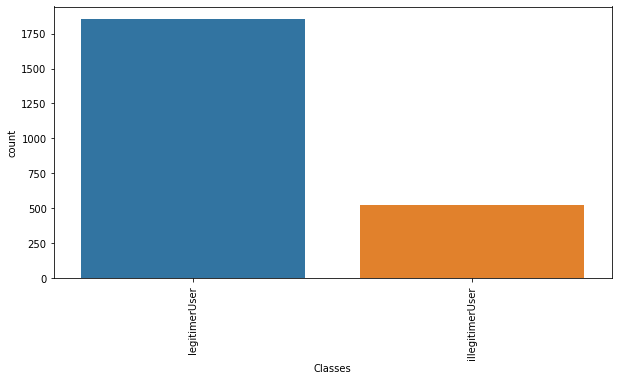

In [18]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Classes", data=df_sensordata)
plt.xticks(x = df_sensordata['Classes'],  rotation='vertical')
plt.show()

#### Initialisieren von 2 features variablen

In [19]:
X = df_sensordata.values[:, :-2]
Y = df_sensordata.values[:, -1]
X = pd.DataFrame(X)
X.shape, Y.shape

((2376, 9), (2376,))

## Überprüfen Sie die Datentypen der einzelnen Merkmale. 



In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2376 entries, 0 to 2375
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2376 non-null   object
 1   1       2376 non-null   object
 2   2       2376 non-null   object
 3   3       2376 non-null   object
 4   4       2376 non-null   object
 5   5       2376 non-null   object
 6   6       2376 non-null   object
 7   7       2376 non-null   object
 8   8       2376 non-null   object
dtypes: object(9)
memory usage: 167.2+ KB


#### check User

In [21]:
# Convert all columns to floats
X = X.astype(float)
print(X.dtypes)

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
dtype: object


Alle Features sind vom Typ float64 und alle 9 sind numerische Features, außer Class (y). Wir müssen Label Encoder machen und sie in numeirc umwandeln.

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2376 entries, 0 to 2375
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2376 non-null   float64
 1   1       2376 non-null   float64
 2   2       2376 non-null   float64
 3   3       2376 non-null   float64
 4   4       2376 non-null   float64
 5   5       2376 non-null   float64
 6   6       2376 non-null   float64
 7   7       2376 non-null   float64
 8   8       2376 non-null   float64
dtypes: float64(9)
memory usage: 167.2 KB


In [23]:
Y[1]

'legitimerUser'

In [24]:
#Total Number of Continous and Categorical features in the training set
num_cols = X._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

Number of numeric features: 9


####Umwandlung von nicht numerischen in numerische Bezeichnungen

In [25]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

In [26]:
# encoding train labels 
encoder.fit(Y)
y = encoder.transform(Y)
y.shape

(2376,)

In [27]:
encoder.classes_

array(['illegitimerUser', 'legitimerUser'], dtype=object)

#### Feature-Skalierung

In [28]:
# Scaling the feature 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
X = scaler.fit_transform(X)
X[1]

array([ 0.14342208, -0.03019968, -0.04442681, -0.23942335, -0.52969269,
       -0.66097646, -0.00215101,  0.01493005, -0.03802191])

#### X und y in Trainings- und Validierungsmengen aufteilen

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 99)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((1900, 9), (476, 9), (1900,), (476,))

In diesem Diagramm sehen Sie die Trainings- und Validierungsergebnisse einer SVM für verschiedene Werte des Kernelparameters Gamma. Bei sehr niedrigen Gammawerten können Sie sehen, dass sowohl der Trainingswert als auch der Validierungswert niedrig sind. Das nennt man Underfitting. Mittlere Gamma-Werte führen zu hohen Werten für beide Bewertungen, d. h. der Klassifikator arbeitet ziemlich gut. Wenn Gamma zu hoch ist, wird der Klassifikator überangepasst, was bedeutet, dass die Trainingspunktzahl gut, aber die Validierungspunktzahl schlecht ist.

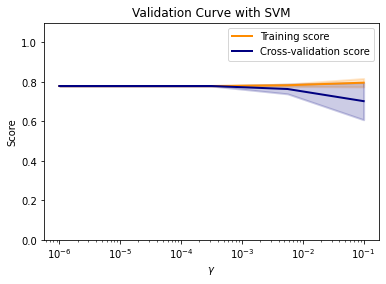

In [31]:
from sklearn.model_selection import validation_curve

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(),
    X,
    y,
    param_name="gamma",
    param_range=param_range,
    scoring="accuracy",
    n_jobs=2,
)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(
    param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_range,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.semilogx(
    param_range, test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_range,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.show()

Scikit-learn definiert eine einfache API zum Erstellen von Visualisierungen für maschinelles Lernen. Das Hauptmerkmal dieser API besteht darin, schnelles Plotten und visuelle Anpassungen ohne Neuberechnung zu ermöglichen. Wir stellen DisplayKlassen bereit, die zwei Methoden zum Erstellen von Diagrammen verfügbar machen: from_estimatorund from_predictions. Die from_estimatorMethode nimmt einen angepassten Schätzer und einige Daten ( Xund y) und erstellt ein DisplayObjekt. Manchmal möchten wir die Vorhersagen nur einmal berechnen und sollten sie from_predictions stattdessen verwenden. Im folgenden Beispiel zeichnen wir eine ROC-Kurve für eine angepasste Support-Vektor-Maschine:

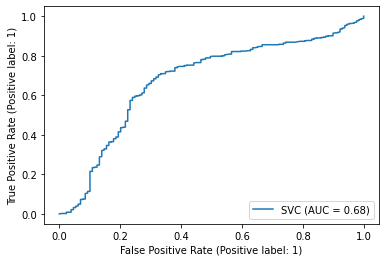

In [32]:
import time
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.datasets import load_wine


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)

Das zurückgegebene svc_dispObjekt ermöglicht es uns, die bereits berechnete ROC-Kurve für SVC in zukünftigen Diagrammen weiter zu verwenden. In diesem Fall ist das svc_dispein RocCurveDisplay, das die berechneten Werte als Attribute mit den Namen roc_auc, fprund speichert tpr. Beachten Sie, dass wir die Vorhersagen von der Support-Vektor-Maschine erhalten und dann from_predictions anstelle von verwenden könnten from_estimator. Als nächstes trainieren wir einen Random-Forest-Klassifikator und zeichnen die zuvor berechnete Roc-Kurve erneut, indem wir die plotMethode des DisplayObjekts verwenden.

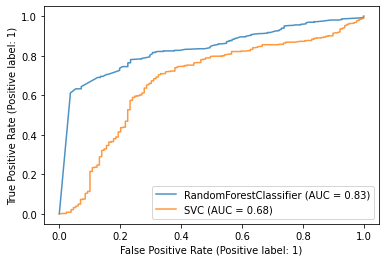

In [33]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)

ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_valid, y_valid, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)

#### Das Modell trainieren
### SVM mit Standard-Hyperparametern ausführen
Standard-Hyperparameter bedeutet C=1.0, Kernel=rbf und Gamma=auto neben anderen Parametern.

In [34]:
# instantiate classifier with default hyperparameters
svc = SVC() 
# fit classifier to training set
svc.fit(X_train,y_train)

SVC()

In [35]:
# make predictions on test set
start_time = time.time()
y_pred = svc.predict(X_valid)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.028 seconds


In [36]:
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))

Model accuracy score with default hyperparameters: 0.7773


#### Hier sind y_valid die wahren Klassenbezeichnungen und y_pred die vorhergesagten Klassenbezeichnungen in der Testmenge.

####SVM mit rbf-Kernel und C=100.0 ausführen

Manchmal gibt es Ausreißer im Datensatz. In diesem Fall sollten wir den Wert von C erhöhen, da ein höheres C weniger Ausreißer bedeutet. Wir könnten also SVM mit Kernel=rbf und C=100.0 ausführen.

Wir werden mit verschiedenen Hyper-Parametern spielen.

In [37]:
# instantiate classifier with rbf kernel and C=100
svc = SVC(C=100.0) 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
start_time = time.time()
y_pred = svc.predict(X_valid)
elapsed_time = time.time() - start_time

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))

# estimate time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Model accuracy score with rbf kernel and C=100.0 : 0.7794
Elapsed time to compute the importances: 0.024 seconds


Wir sehen, dass wir mit C=100,0 eine höhere Genauigkeit erhalten, da ein höheres C weniger Ausreißer bedeutet. 

Jetzt werde ich den Wert von C=1000.0 weiter erhöhen und die Genauigkeit überprüfen.

### SVM mit rbf-Kernel und C=1000.0 ausführen

In [38]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
start_time = time.time()
y_pred = svc.predict(X_valid)
elapsed_time = time.time() - start_time
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))
# estimate time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Model accuracy score with rbf kernel and C=1000.0 : 0.7815
Elapsed time to compute the importances: 0.022 seconds


#### Run SVM with linear kernel 
Run SVM with linear kernel and C=1.0

In [39]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 

# fit classifier to training set
linear_svc.fit(X_train,y_train)

# make predictions on test set
start_time = time.time()
y_pred_test=linear_svc.predict(X_valid)
elapsed_time = time.time() - start_time

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred_test)))
# estimate time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Model accuracy score with linear kernel and C=1.0 : 0.7668
Elapsed time to compute the importances: 0.008 seconds


In [40]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 

# fit classifier to training set
linear_svc100.fit(X_train, y_train)

# make predictions on test set
start_time = time.time()
y_pred_test=linear_svc.predict(X_valid)
elapsed_time = time.time() - start_time

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))
# estimate time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Model accuracy score with linear kernel and C=100.0 : 0.7815
Elapsed time to compute the importances: 0.008 seconds


#### Run SVM with linear kernel and C=1000.0

In [41]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 

# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
start_time = time.time()
y_pred_test=linear_svc.predict(X_valid)
elapsed_time = time.time() - start_time


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))
# estimate time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Model accuracy score with linear kernel and C=1000.0 : 0.7815
Elapsed time to compute the importances: 0.009 seconds


Wir können sehen, dass wir mit C=100.0 und C=1000.0 keine höhere Genauigkeit als mit C=1.0 erzielen können.
## Vergleich der Genauigkeit von Trainings- und Testsatz
Jetzt vergleiche ich die Genauigkeit des Trainings- und des Testsatzes, um zu prüfen, ob die Anpassung zu hoch ist.

In [42]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7778


Wir sehen, dass die Genauigkeit des Trainingssets und des Test-Sets sehr vergleichbar sind.

## Überprüfung auf Über- und Unteranpassung

In [43]:
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Validation set score: {:.4f}'.format(linear_svc.score(X_valid, y_valid)))

Training set score: 0.7778
Validation set score: 0.7668


The training-set accuracy score is 51,43 while the validation-set accuracy to be 44,29. These two values are quite comparable. So, there is no question of overfitting.

## Vergleich der Modellgenauigkeit mit der Null-Genauigkeit
Die Modellgenauigkeit beträgt also 0,6625. Wir können jedoch nicht sagen, dass unser Modell aufgrund der obigen Genauigkeit sehr gut ist. Wir müssen es mit der Null-Genauigkeit vergleichen. Die Null-Genauigkeit ist die Genauigkeit, die erreicht werden kann, wenn immer die häufigste Klasse vorhergesagt wird.

Daher sollten wir zunächst die Klassenverteilung in der Validierungsmenge überprüfen.

In [44]:
# check class distribution in validation set

y_valid

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,

### SVM mit polynomialem Kernel ausführen
SVM mit polynomialem Kernel und C=1.0 ausführen

In [45]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 

# fit classifier to training set
poly_svc.fit(X_train,y_train)

# make predictions on test set
start_time = time.time()
y_pred_test=poly_svc.predict(X_valid)
elapsed_time = time.time() - start_time

# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))
# estimate time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Model accuracy score with polynomial kernel and C=1.0 : 0.7815
Elapsed time to compute the importances: 0.011 seconds


### SVM mit polynomialem Kernel und C=100.0 ausführen

In [46]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 

# fit classifier to training set
poly_svc100.fit(X_train, y_train)

# make predictions on test set
start_time = time.time()
y_pred_test=poly_svc.predict(X_valid)
elapsed_time = time.time() - start_time

# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))
# estimate time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Model accuracy score with polynomial kernel and C=1.0 : 0.7815
Elapsed time to compute the importances: 0.010 seconds


Der polynomiale Kernel liefert eine schlechte Leistung. Möglicherweise passt er sich zu stark an die Trainingsmenge an.

### SVM mit sigmoidem Kernel ausführen
SVM mit sigmoidem Kernel und C=1.0 ausführen

In [47]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 

# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)

# make predictions on test set
start_time = time.time()
y_pred=sigmoid_svc.predict(X_valid)
elapsed_time = time.time() - start_time

# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))
# estimate time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Model accuracy score with sigmoid kernel and C=1.0 : 0.6954
Elapsed time to compute the importances: 0.017 seconds


#### SVM mit sigmoidem Kernel und C=100.0 ausführen

In [48]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 

# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)

# make predictions on test set
start_time = time.time()
y_pred=sigmoid_svc.predict(X_valid)
elapsed_time = time.time() - start_time

# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_valid, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.6954


Es ist zu erkennen, dass der Sigmoid-Kernel genauso schlecht abschneidet wie der Polynom-Kernel.

## Hyperparameter-Abstimmung mit Gittersuche und Kreuzvalidierung

In [49]:
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [50]:
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
clf = svm_model.fit(X_train, y_train)

### Konfusionsmatrix und Genauigkeitswert

In [51]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_valid)
Y_pred_label = list(encoder.inverse_transform(Y_pred))
#Y_pred_label

Best score for training data: 0.7777783023321689 

Best C: 1 

Best Kernel: rbf 

Best Gamma: 0.001 



In [52]:
# Making the Confusion Matrix
#print(pd.crosstab(Y_test_label, Y_pred_label, rownames=['Actual Activity'], colnames=['Predicted Activity']))
print(confusion_matrix(y_valid,Y_pred))
print("\n")
print(classification_report(y_valid,Y_pred))

print("Training set score for SVM: %f" % final_model.score(X_train , y_train,  zero_division=1))
print("Validation set score for SVM: %f" % final_model.score(X_valid  , y_valid, zero_division=1 ))

[[  0 111]
 [  0 365]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       111
           1       0.77      1.00      0.87       365

    accuracy                           0.77       476
   macro avg       0.38      0.50      0.43       476
weighted avg       0.59      0.77      0.67       476



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TypeError: ignored

### Plot hyperplane Linear SVM python

In [ ]:
from sklearn import svm
fig, ax = plt.subplots()
clf2 = svm.LinearSVC(C=1).fit(X, y)

# get the separating hyperplane
w = clf2.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf2.intercept_[0]) / w[1]

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),
                     np.arange(y_min, y_max, .2))
Z = clf2.predict(np.c_[xx2.ravel(), yy2.ravel()])

Z = Z.reshape(xx2.shape)
ax.contourf(xx2, yy2, Z, cmap=plt.cm.coolwarm, alpha=0.3)
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=25)
ax.plot(xx,yy)

ax.axis([x_min, x_max,y_min, y_max])
plt.show()

# Zusammenfassung
Wir erhalten die höchste Genauigkeit mit `rbf` und `linear` Kernel mit C=100.0. und die Genauigkeit ist 50%. Aus der obigen Analyse können wir schließen, dass die Genauigkeit unseres Klassifizierungsmodells sehr gut ist. Unser Modell leistet eine sehr gute Arbeit bei der Vorhersage der Klassenbezeichnungen.
**bold text**